<a href="https://colab.research.google.com/github/BaberFaisal/Linkedin_Network_Analysis/blob/main/NetWork_Analysis__Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-louvain

Import libraries

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import community.community_louvain as community_louvain

Load datasets

In [ ]:
df = pd.read_excel("/content/output.xlsx")
df1 = pd.read_csv("/content/Cleaned_Connections.csv")

Preprocess and standardize names

In [ ]:
df['person A'] = df['person A'].str.strip()
df['person B'] = df['person B'].str.strip()
df1['Name'] = df1['First Name'].str.strip() + " " + df1['Last Name'].str.strip()


Build the undirected ego network graph

In [ ]:
G = nx.Graph()
G.add_edges_from(df[['person A', 'person B']].values)

Assign node attributes (Position, Company)

In [ ]:
attributes = df1.groupby("Name")[['Position', 'Company']].first().to_dict('index')
nx.set_node_attributes(G, attributes)

Network Summary

In [ ]:
print("Number of Nodes:", G.number_of_nodes())
print("Number of Edges:", G.number_of_edges())
print("Is Directed:", G.is_directed())
print("Is Weighted:", nx.is_weighted(G))

Number of Nodes: 143
Number of Edges: 848
Is Directed: False
Is Weighted: False


Degree Distribution

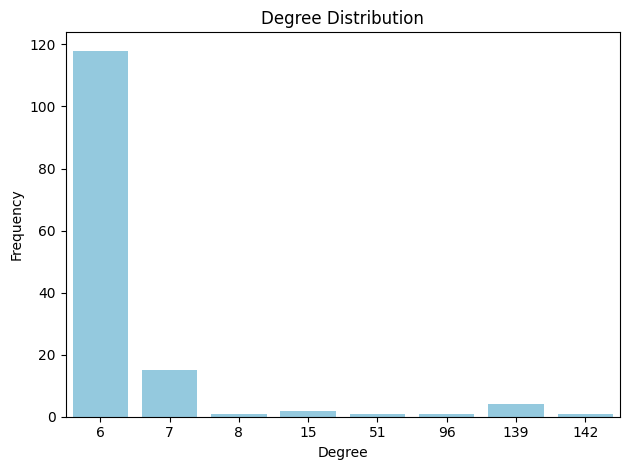

In [ ]:
degrees = [d for n, d in G.degree()]
degree_counts = Counter(degrees)
degree_df = pd.DataFrame(degree_counts.items(), columns=["Degree", "Frequency"])
sns.barplot(data=degree_df.sort_values("Degree"), x="Degree", y="Frequency", color="skyblue")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Average Path Length & Clustering Coefficient

In [ ]:
if nx.is_connected(G):
    print("Average Path Length:", nx.average_shortest_path_length(G))
else:
    print("Average Path Length: Graph is not connected")

print("Clustering Coefficient:", nx.average_clustering(G))

Average Path Length: 1.9164778883088742
Clustering Coefficient: 0.5852084169937142


Centrality Measures

In [ ]:
centralities = {
    "Degree": nx.degree_centrality(G),
    "Betweenness": nx.betweenness_centrality(G),
    "Closeness": nx.closeness_centrality(G),
    "Eigenvector": nx.eigenvector_centrality(G)
}

for key in centralities:
    top_nodes = sorted(centralities[key].items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"\nTop 5 Nodes by {key} Centrality:")
    for name, score in top_nodes:
        print(f"{name}: {score:.4f}")


Top 5 Nodes by Degree Centrality:
Amal Mahmoud , PhD: 1.0000
Areej Ashraf: 0.9789
Raz Muhammad: 0.9789
Ahemd ali: 0.9789
Alaa Elnakeeb: 0.9789

Top 5 Nodes by Betweenness Centrality:
Amal Mahmoud , PhD: 0.1685
Areej Ashraf: 0.1685
Raz Muhammad: 0.1685
Ahemd ali: 0.1685
Alaa Elnakeeb: 0.1685

Top 5 Nodes by Closeness Centrality:
Amal Mahmoud , PhD: 1.0000
Areej Ashraf: 0.9793
Raz Muhammad: 0.9793
Ahemd ali: 0.9793
Alaa Elnakeeb: 0.9793

Top 5 Nodes by Eigenvector Centrality:
Amal Mahmoud , PhD: 0.3237
Areej Ashraf: 0.2947
Raz Muhammad: 0.2947
Ahemd ali: 0.2947
Alaa Elnakeeb: 0.2947


Community Detection with Louvain and Greedy Modularity

In [ ]:
from networkx.algorithms.community import (
    girvan_newman,
    label_propagation_communities,
    greedy_modularity_communities
)
from community.community_louvain import modularity

def print_modularity_stats(G, communities, method_name):
    partition = {}
    for i, community in enumerate(communities):
        for node in community:
            partition[node] = i
    mod = modularity(partition, G)
    print(f"{method_name} → Modularity: {mod:.4f}, Number of Communities: {len(communities)}")
#Greedy Modularity
communities_greedy = list(greedy_modularity_communities(G))
print_modularity_stats(G, communities_greedy, "Greedy Modularity")

Greedy Modularity → Modularity: 0.0806, Number of Communities: 3


In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

communities_greedy = list(greedy_modularity_communities(G))

# Print communities
for i, c in enumerate(communities_greedy):
    print(f"Community {i+1}: {list(c)}")


Community 1: ['Abdul Razaque', 'Nabeel Arain', 'jai mala', 'SAMMAR ABBAS', 'Kamran Ali', 'Parkash Meghwar', 'Khalid Hussain', 'Hammad Ahmed', 'Aizaz Ullah Khan Niazi', 'Ramesh Kumar', 'Prof. Dr. Irfan Ahmed Rind', 'Khadija Arain', 'Muhammad Hamza', 'Tahir Abbas Shaikh', 'Engr Mohammad Adeel Soomro', 'Sarang Shaikh', 'Atif Luqman', 'Raz Muhammad', 'Ghulam Mujtaba', 'BABAR HUSSAIN', 'Muhammad Shahroz', 'Ammar Ahmed', 'Areej Ashraf', 'Asifa Khan', 'Ali Raza Chana', 'Zeeshan Ali Mangi', 'Ghulam Muttaqa Shah', 'Sule Yildirim Yayilgan', 'Sohail Kumar', 'Zeeshan Yaqoob', 'Sajid Rasheed', 'Raqib Ahmed', 'Dileep Kumar', 'Raheel Ahmed', 'Sajid Khan', 'Ameet Kumar', 'Shah Muhammad', 'Ghulam Suleman', 'Usama Mangi', 'Haseeb Ullah Abbasi', 'Haider Ali', 'Usama Bin Ahmed', 'Indir Lal', 'Rahul Puri', 'Muhammad Salman Tanveer', 'Asif Rajput', 'Nikita Iserson', 'Omar Zeb', 'Adnan Rauf', 'Moazam Abbasi', 'Sajid Ali', 'Muhammad Salman Khan', 'G Murtaza Memon, PhD', 'Prof. Dr. Abdul Rehman', 'Ameer Hamza 

In [ ]:
partition = community_louvain.best_partition(G)
modularity = community_louvain.modularity(partition, G)
num_communities = len(set(partition.values()))
print(f"Louvain Modularity: {modularity:.4f}")
print(f"Number of Communities: {num_communities}")

Louvain Modularity: 0.0822
Number of Communities: 4


 Network Visualization

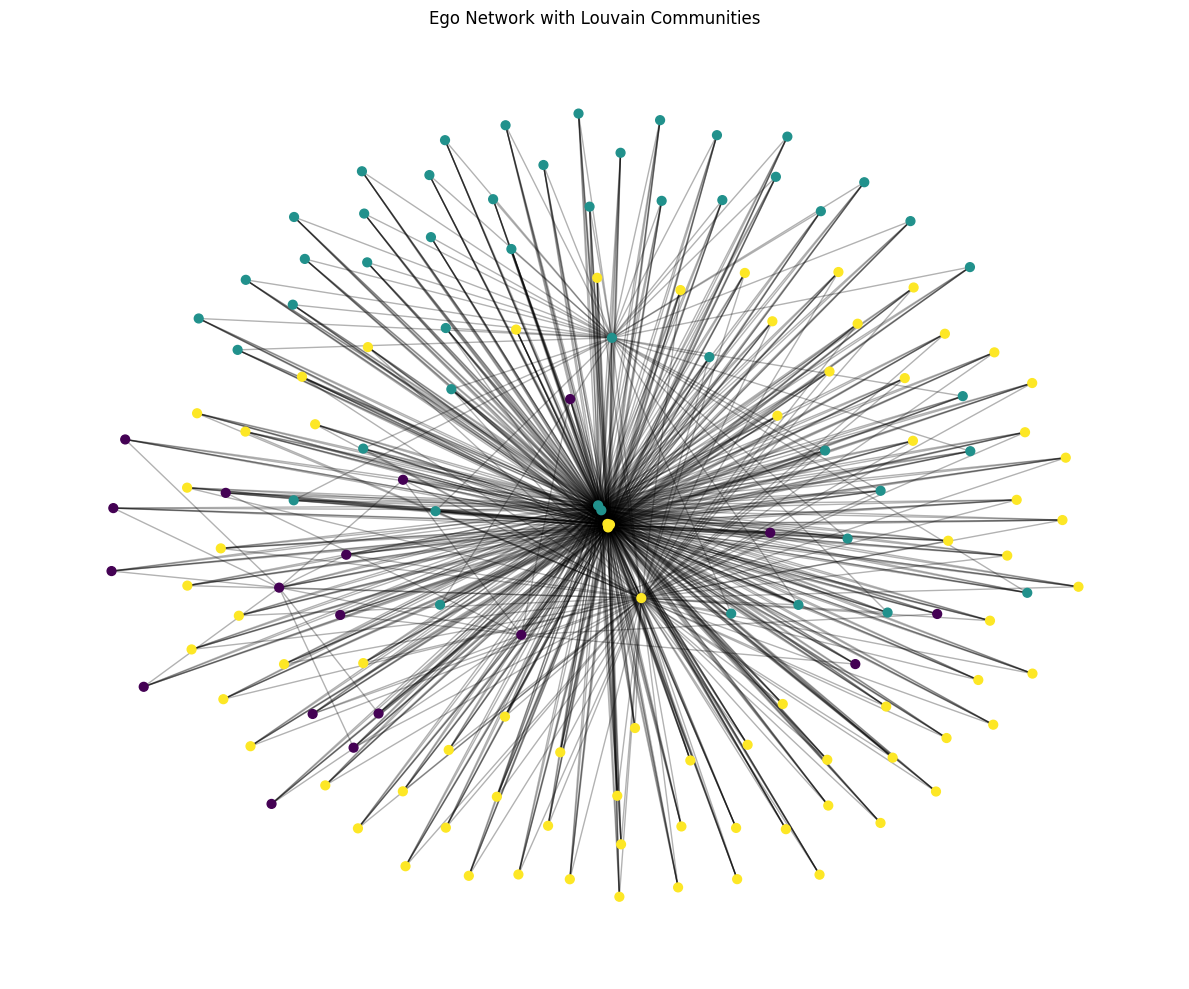

In [ ]:
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_size=40, node_color=list(partition.values()), cmap=plt.cm.viridis)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Ego Network with Louvain Communities")
plt.axis("off")
plt.tight_layout()
plt.show()

Compare with ER, BA, WS models

In [ ]:
n = G.number_of_nodes()
m = G.number_of_edges()
p_er = 2 * m / (n * (n - 1))
m_ba = max(1, round(m / n))
k_ws = 4 if n > 4 else 2
p_ws = 0.1

G_er = nx.erdos_renyi_graph(n=n, p=p_er, seed=42)
G_ba = nx.barabasi_albert_graph(n=n, m=m_ba, seed=42)
G_ws = nx.watts_strogatz_graph(n=n, k=k_ws, p=p_ws, seed=42)

def model_stats(graph, name):
    clustering = nx.average_clustering(graph)
    path_len = nx.average_shortest_path_length(graph) if nx.is_connected(graph) else "Not connected"
    return (name, clustering, path_len)

stats = [
    model_stats(G, "Original"),
    model_stats(G_er, "Erdos-Renyi"),
    model_stats(G_ba, "Barabasi-Albert"),
    model_stats(G_ws, "Watts-Strogatz")
]

for name, clustering, path_len in stats:
    print(f"{name} → Clustering: {clustering}, Avg Path Length: {path_len}")

Original → Clustering: 0.5852084169937142, Avg Path Length: 1.9164778883088742
Erdos-Renyi → Clustering: 0.07762185409135974, Avg Path Length: 2.2820841130700287
Barabasi-Albert → Clustering: 0.1625572040097097, Avg Path Length: 2.2352999113562495
Watts-Strogatz → Clustering: 0.3885780885780886, Avg Path Length: 5.635871171082439


PageRank

<ipython-input-99-8ad902bffa26>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


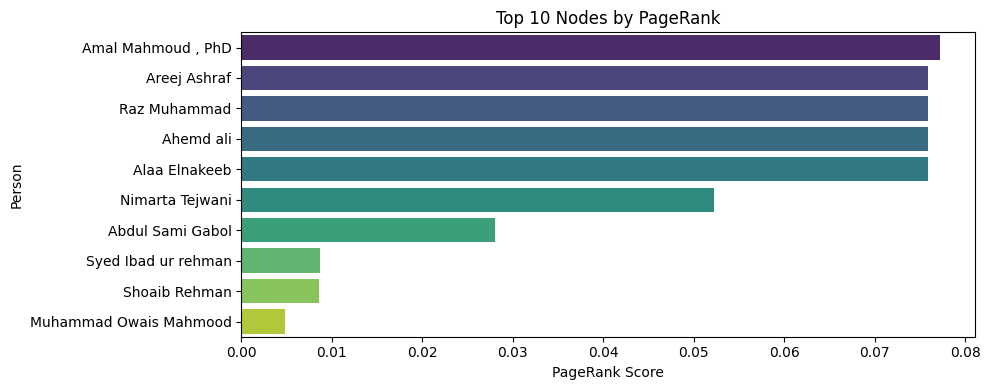

In [ ]:
pagerank = nx.pagerank(G)
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
plt.figure(figsize=(10, 4))
sns.barplot(
    x=[x[1] for x in top_pagerank],
    y=[x[0] for x in top_pagerank],
    palette="viridis",
    hue=None,
    legend=False
)
plt.title("Top 10 Nodes by PageRank")
plt.xlabel("PageRank Score")
plt.ylabel("Person")
plt.tight_layout()
plt.show()

HITS

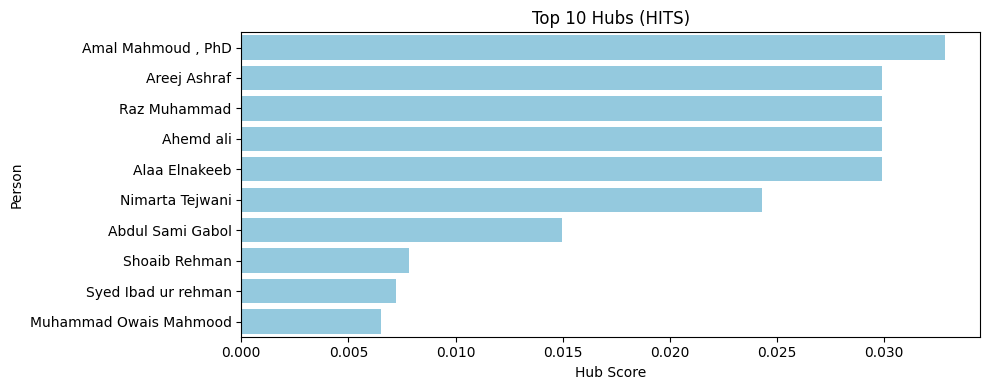

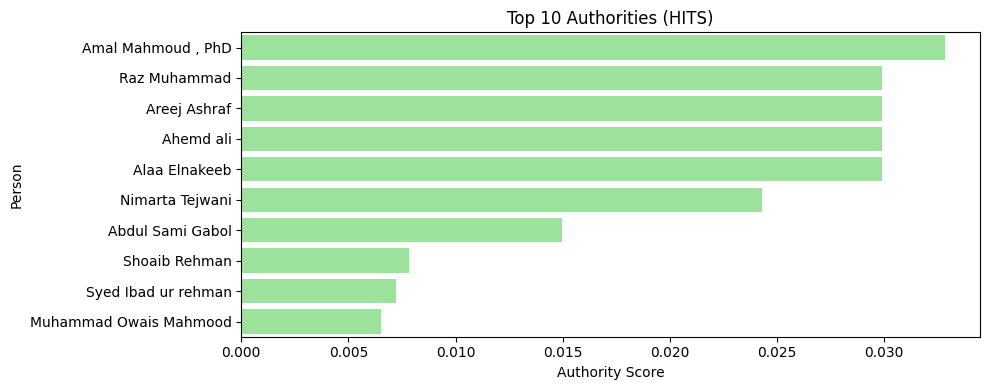

In [ ]:
hubs, authorities = nx.hits(G, max_iter=1000, normalized=True)
top_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:10]
top_auth = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:10]

plt.figure(figsize=(10, 4))
sns.barplot(x=[x[1] for x in top_hubs], y=[x[0] for x in top_hubs], color="skyblue")
plt.title("Top 10 Hubs (HITS)")
plt.xlabel("Hub Score")
plt.ylabel("Person")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=[x[1] for x in top_auth], y=[x[0] for x in top_auth], color="lightgreen")
plt.title("Top 10 Authorities (HITS)")
plt.xlabel("Authority Score")
plt.ylabel("Person")
plt.tight_layout()
plt.show()

Assortativity

In [ ]:
deg_assortativity = nx.degree_assortativity_coefficient(G)
print(f"Degree Assortativity Coefficient: {deg_assortativity:.4f}")

position_assortativity = nx.attribute_assortativity_coefficient(G, 'Position')
company_assortativity = nx.attribute_assortativity_coefficient(G, 'Company')
print(f"Position Assortativity: {position_assortativity}")
print(f"Company Assortativity: {company_assortativity}")

Degree Assortativity Coefficient: -0.8794
Position Assortativity: -0.03653216692723427
Company Assortativity: -0.03816207427151764


Jaccard Similarity

In [ ]:
pairs = list(nx.non_edges(G))[:100]

def jaccard_similarity(G, u, v):
    neighbors1 = set(G.neighbors(u))
    neighbors2 = set(G.neighbors(v))
    union_size = len(neighbors1.union(neighbors2))
    intersection_size = len(neighbors1.intersection(neighbors2))
    return intersection_size / union_size if union_size else 0.0

jaccard_scores = [jaccard_similarity(G, u, v) for u, v in pairs]
print("\nSample Jaccard Scores:", jaccard_scores[:5])


Sample Jaccard Scores: [0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143]


K-Core Decomposition

In [ ]:
core_numbers = nx.core_number(G)
max_core = max(core_numbers.values())
print(f"\nMax K-Core: {max_core}")
print("Top nodes in highest k-core:")
for node, core in core_numbers.items():
    if core == max_core:
        print(f" - {node}")



Max K-Core: 7
Top nodes in highest k-core:
 - Amal Mahmoud , PhD
 - Areej Ashraf
 - Raz Muhammad
 - Ahemd ali
 - Alaa Elnakeeb
 - Shoaib Rehman
 - Syed Ibad ur rehman
 - Muhammad Owais Mahmood
 - Ali Abdullah
 - Muhammad Asad
 - Muneeb Ali
 - Muhammad Abdullah Hayat
 - Suman laraee
 - Nimarta Tejwani
 - Abdul Sami Gabol
 - Sadia Noor
 - Gul Afshan
 - Suraj Panjwani
 - Dr. Muhammad Shaique Khan
 - Saima Batool
 - Abdul Rab
 - Ahmad Waqas
 - Abdul Waheed
 - Ali Hyder
 - Subhan Ali Mangi
